In [1]:
#@title
!pip install git+https://www.github.com/keras-team/keras-contrib.git
!pip install pillow

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-d8e5r05m
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-d8e5r05m
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101066 sha256=e804170d057af4fd5afe87f04f1b5c4f2d91ff3cd43e096ecef1ebd697426d5b
  Stored in directory: /tmp/pip-ephem-wheel-cache-fnmhugaw/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [2]:
from google.colab import drive 
drive.mount('/content/drive/')
root_dir = '/content/drive/My Drive/Colab Notebooks/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import imageio
from skimage.transform import resize
from PIL import Image

In [4]:
import scipy
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
class DataLoader():
    def __init__(self, dataset_name, img_res=(64, 64)): #128, 128
        self.dataset_name = dataset_name
        self.img_res = img_res

    def load_data(self, batch_size=1, is_testing=False):
        data_type = "train" if not is_testing else "test"
        path = glob('/content/drive/My Drive/Colab Notebooks/datasets/%s/%s/*' % (self.dataset_name, data_type))
        batch_images = np.random.choice(path, size=batch_size)
        imgs_A = []
        imgs_B = []
        for img_path in batch_images:
            img = self.imread(img_path)
            img_np = np.array(img)/255
            h, w, _ = img_np.shape
            _w = int(w/2)
            img_A, img_B = img_np[:, :_w, :], img_np[:, _w:, :]
            #img_A = scipy.misc.imresize(img_A, self.img_res)
            #img_B = scipy.misc.imresize(img_B, self.img_res)
            img_A = img_A * 255
            img_A = img_A.astype(np.uint8)
            img_A = Image.fromarray(img_A)
            img_B = img_B * 255
            img_B = img_B.astype(np.uint8)
            img_B = Image.fromarray(img_B)
            img_A = img_A.resize((self.img_res))
            img_B = img_B.resize((self.img_res))
            img_A = np.array(img_A)*255
            img_B = np.array(img_B)*255
            # If training => do random flip
            if not is_testing and np.random.random() < 0.5:
                img_A = np.fliplr(img_A)
                img_B = np.fliplr(img_B)
            imgs_A.append(img_A)
            imgs_B.append(img_B)
        imgs_A = (np.array(imgs_A)*255)/127.5 - 1.
        imgs_B = (np.array(imgs_B)*255)/127.5 - 1.
        return imgs_B, imgs_A

    def load_batch(self, batch_size=1, is_testing=False):
        data_type = "train" if not is_testing else "val"
        path = glob('/content/drive/My Drive/Colab Notebooks/datasets/%s/%s/*' % (self.dataset_name, data_type))
        self.n_batches = int(len(path) / batch_size)
        for i in range(self.n_batches-1):
            batch = path[i*batch_size:(i+1)*batch_size]
            imgs_A, imgs_B = [], []
            for img in batch:
                img = self.imread(img)
                #print('img = ')
                #img.show()
                #img.save('/content/drive/My Drive/Colab Notebooks/datasets/test_img/img.jpg')
                img_np = np.array(img)/255;
                h, w, _ = img_np.shape
                half_w = int(w/2)
                img_A = img_np[:, :half_w, :]
                img_B = img_np[:, half_w:, :]

                img_A = img_A * 255
                img_A = img_A.astype(np.uint8)
                img_A = Image.fromarray(img_A)

                img_B = img_B * 255
                img_B = img_B.astype(np.uint8)
                img_B = Image.fromarray(img_B)

                img_A = img_A.resize((self.img_res))
                img_B = img_B.resize((self.img_res))

                img_A = np.array(img_A)*255
                img_B = np.array(img_B)*255
            
                if not is_testing and np.random.random() > 0.5:
                        img_A = np.fliplr(img_A)
                        img_B = np.fliplr(img_B)

                imgs_A.append(img_A)
                imgs_B.append(img_B)

            imgs_A = (np.array(imgs_A)*255)/127.5 - 1.
            imgs_B = (np.array(imgs_B)*255)/127.5 - 1.

            yield imgs_B, imgs_A

    def imread(self, path):
        im = Image.open(path)
        return im.convert('RGB')

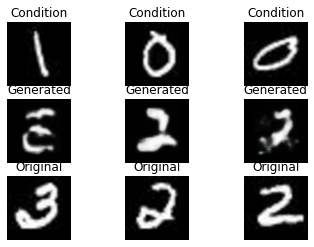

[Epoch 161/200] [Batch 1/61] [D loss: 0.001846, D acc: 100%] [G loss: 3.607838] time: 4:34:53.766907
[Epoch 161/200] [Batch 2/61] [D loss: 0.002519, D acc: 100%] [G loss: 3.708190] time: 4:34:55.375036
[Epoch 161/200] [Batch 3/61] [D loss: 0.002199, D acc: 100%] [G loss: 3.653094] time: 4:34:56.990636
[Epoch 161/200] [Batch 4/61] [D loss: 0.002329, D acc: 100%] [G loss: 3.752374] time: 4:34:58.644048
[Epoch 161/200] [Batch 5/61] [D loss: 0.002655, D acc: 100%] [G loss: 3.677811] time: 4:35:00.291246
[Epoch 161/200] [Batch 6/61] [D loss: 0.005126, D acc: 100%] [G loss: 3.497192] time: 4:35:01.895436
[Epoch 161/200] [Batch 7/61] [D loss: 0.006833, D acc: 100%] [G loss: 3.819775] time: 4:35:03.546690
[Epoch 161/200] [Batch 8/61] [D loss: 0.008799, D acc: 100%] [G loss: 3.746201] time: 4:35:05.196362
[Epoch 161/200] [Batch 9/61] [D loss: 0.008144, D acc: 100%] [G loss: 3.553836] time: 4:35:06.826068
[Epoch 161/200] [Batch 10/61] [D loss: 0.006070, D acc: 100%] [G loss: 3.654745] time: 4:35

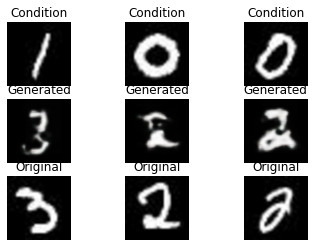

[Epoch 162/200] [Batch 1/61] [D loss: 0.002532, D acc: 100%] [G loss: 3.611176] time: 4:36:35.504172
[Epoch 162/200] [Batch 2/61] [D loss: 0.003457, D acc: 100%] [G loss: 3.598827] time: 4:36:37.155153
[Epoch 162/200] [Batch 3/61] [D loss: 0.002444, D acc: 100%] [G loss: 3.612298] time: 4:36:38.815966
[Epoch 162/200] [Batch 4/61] [D loss: 0.002514, D acc: 100%] [G loss: 3.685074] time: 4:36:40.452617
[Epoch 162/200] [Batch 5/61] [D loss: 0.001952, D acc: 100%] [G loss: 3.504148] time: 4:36:42.043474
[Epoch 162/200] [Batch 6/61] [D loss: 0.002803, D acc: 100%] [G loss: 3.474792] time: 4:36:43.671182
[Epoch 162/200] [Batch 7/61] [D loss: 0.002993, D acc: 100%] [G loss: 3.706722] time: 4:36:45.332396
[Epoch 162/200] [Batch 8/61] [D loss: 0.003254, D acc: 100%] [G loss: 3.752422] time: 4:36:46.971084
[Epoch 162/200] [Batch 9/61] [D loss: 0.003936, D acc: 100%] [G loss: 3.579369] time: 4:36:48.621725
[Epoch 162/200] [Batch 10/61] [D loss: 0.003309, D acc:  99%] [G loss: 3.630465] time: 4:36

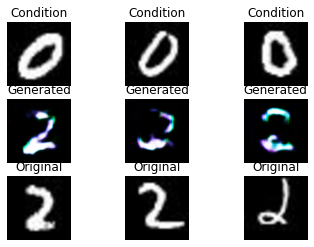

[Epoch 163/200] [Batch 1/61] [D loss: 0.338705, D acc:  50%] [G loss: 8.385989] time: 4:38:17.624032
[Epoch 163/200] [Batch 2/61] [D loss: 0.312084, D acc:  48%] [G loss: 7.621679] time: 4:38:19.217960
[Epoch 163/200] [Batch 3/61] [D loss: 0.295172, D acc:  47%] [G loss: 6.910085] time: 4:38:20.815124
[Epoch 163/200] [Batch 4/61] [D loss: 0.303558, D acc:  47%] [G loss: 6.577134] time: 4:38:22.475923
[Epoch 163/200] [Batch 5/61] [D loss: 0.291788, D acc:  46%] [G loss: 5.890925] time: 4:38:24.086624
[Epoch 163/200] [Batch 6/61] [D loss: 0.289482, D acc:  47%] [G loss: 5.623342] time: 4:38:25.818714
[Epoch 163/200] [Batch 7/61] [D loss: 0.284247, D acc:  47%] [G loss: 5.428432] time: 4:38:27.496529
[Epoch 163/200] [Batch 8/61] [D loss: 0.282825, D acc:  47%] [G loss: 5.328681] time: 4:38:29.134010
[Epoch 163/200] [Batch 9/61] [D loss: 0.285282, D acc:  47%] [G loss: 5.041178] time: 4:38:30.792542
[Epoch 163/200] [Batch 10/61] [D loss: 0.285604, D acc:  47%] [G loss: 4.896754] time: 4:38

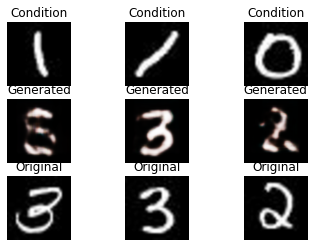

[Epoch 164/200] [Batch 1/61] [D loss: 0.271682, D acc:  44%] [G loss: 4.143575] time: 4:40:01.108202
[Epoch 164/200] [Batch 2/61] [D loss: 0.267181, D acc:  45%] [G loss: 4.024217] time: 4:40:02.675519
[Epoch 164/200] [Batch 3/61] [D loss: 0.268921, D acc:  44%] [G loss: 3.908010] time: 4:40:04.336549
[Epoch 164/200] [Batch 4/61] [D loss: 0.269973, D acc:  46%] [G loss: 3.853467] time: 4:40:05.992944
[Epoch 164/200] [Batch 5/61] [D loss: 0.267884, D acc:  43%] [G loss: 3.742637] time: 4:40:07.598720
[Epoch 164/200] [Batch 6/61] [D loss: 0.268082, D acc:  45%] [G loss: 3.816553] time: 4:40:09.241283
[Epoch 164/200] [Batch 7/61] [D loss: 0.267888, D acc:  45%] [G loss: 3.959525] time: 4:40:10.923603
[Epoch 164/200] [Batch 8/61] [D loss: 0.267180, D acc:  47%] [G loss: 3.955616] time: 4:40:12.573202
[Epoch 164/200] [Batch 9/61] [D loss: 0.267419, D acc:  45%] [G loss: 3.781912] time: 4:40:14.247868
[Epoch 164/200] [Batch 10/61] [D loss: 0.267948, D acc:  44%] [G loss: 3.878343] time: 4:40

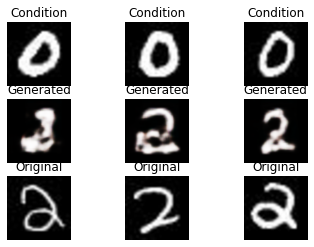

[Epoch 165/200] [Batch 1/61] [D loss: 0.267350, D acc:  43%] [G loss: 3.674682] time: 4:41:43.426251
[Epoch 165/200] [Batch 2/61] [D loss: 0.265926, D acc:  44%] [G loss: 3.862048] time: 4:41:45.064186
[Epoch 165/200] [Batch 3/61] [D loss: 0.265032, D acc:  43%] [G loss: 3.749622] time: 4:41:46.684039
[Epoch 165/200] [Batch 4/61] [D loss: 0.265253, D acc:  46%] [G loss: 3.763908] time: 4:41:48.331170
[Epoch 165/200] [Batch 5/61] [D loss: 0.266261, D acc:  42%] [G loss: 3.549694] time: 4:41:49.947186
[Epoch 165/200] [Batch 6/61] [D loss: 0.264949, D acc:  43%] [G loss: 3.650191] time: 4:41:51.571476
[Epoch 165/200] [Batch 7/61] [D loss: 0.266234, D acc:  43%] [G loss: 3.892116] time: 4:41:53.199533
[Epoch 165/200] [Batch 8/61] [D loss: 0.264921, D acc:  44%] [G loss: 3.777130] time: 4:41:54.869269
[Epoch 165/200] [Batch 9/61] [D loss: 0.266119, D acc:  43%] [G loss: 3.628470] time: 4:41:56.559837
[Epoch 165/200] [Batch 10/61] [D loss: 0.265853, D acc:  42%] [G loss: 3.725606] time: 4:41

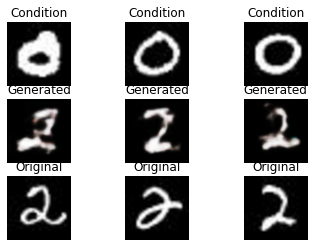

[Epoch 166/200] [Batch 1/61] [D loss: 0.265124, D acc:  44%] [G loss: 3.585004] time: 4:43:25.332948
[Epoch 166/200] [Batch 2/61] [D loss: 0.262812, D acc:  44%] [G loss: 3.670840] time: 4:43:26.927392
[Epoch 166/200] [Batch 3/61] [D loss: 0.264704, D acc:  41%] [G loss: 3.707776] time: 4:43:28.524287
[Epoch 166/200] [Batch 4/61] [D loss: 0.262686, D acc:  46%] [G loss: 3.765060] time: 4:43:30.186956
[Epoch 166/200] [Batch 5/61] [D loss: 0.265758, D acc:  41%] [G loss: 3.555543] time: 4:43:31.830929
[Epoch 166/200] [Batch 6/61] [D loss: 0.264597, D acc:  42%] [G loss: 3.475957] time: 4:43:33.471405
[Epoch 166/200] [Batch 7/61] [D loss: 0.263915, D acc:  42%] [G loss: 3.718925] time: 4:43:35.145884
[Epoch 166/200] [Batch 8/61] [D loss: 0.263272, D acc:  44%] [G loss: 3.882926] time: 4:43:36.790767
[Epoch 166/200] [Batch 9/61] [D loss: 0.263145, D acc:  43%] [G loss: 3.568128] time: 4:43:38.459805
[Epoch 166/200] [Batch 10/61] [D loss: 0.263137, D acc:  44%] [G loss: 3.647494] time: 4:43

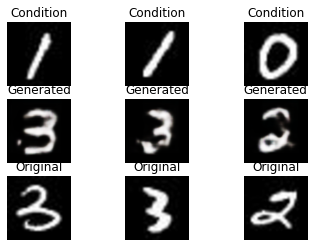

[Epoch 167/200] [Batch 1/61] [D loss: 0.267103, D acc:  42%] [G loss: 3.662526] time: 4:45:07.449026
[Epoch 167/200] [Batch 2/61] [D loss: 0.262239, D acc:  42%] [G loss: 3.640557] time: 4:45:09.043489
[Epoch 167/200] [Batch 3/61] [D loss: 0.263575, D acc:  41%] [G loss: 3.536801] time: 4:45:10.663388
[Epoch 167/200] [Batch 4/61] [D loss: 0.263042, D acc:  44%] [G loss: 3.617618] time: 4:45:12.335423
[Epoch 167/200] [Batch 5/61] [D loss: 0.264030, D acc:  41%] [G loss: 3.487100] time: 4:45:13.962766
[Epoch 167/200] [Batch 6/61] [D loss: 0.263920, D acc:  43%] [G loss: 3.481524] time: 4:45:15.596527
[Epoch 167/200] [Batch 7/61] [D loss: 0.262845, D acc:  42%] [G loss: 3.726344] time: 4:45:17.243424
[Epoch 167/200] [Batch 8/61] [D loss: 0.261696, D acc:  44%] [G loss: 3.701175] time: 4:45:18.925061
[Epoch 167/200] [Batch 9/61] [D loss: 0.262161, D acc:  44%] [G loss: 3.631793] time: 4:45:20.610885
[Epoch 167/200] [Batch 10/61] [D loss: 0.260533, D acc:  44%] [G loss: 3.713436] time: 4:45

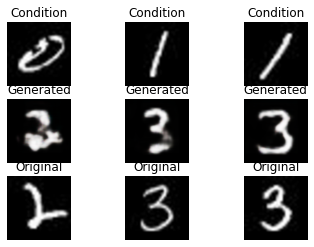

[Epoch 168/200] [Batch 1/61] [D loss: 0.274963, D acc:  37%] [G loss: 3.620439] time: 4:46:50.176358
[Epoch 168/200] [Batch 2/61] [D loss: 0.256964, D acc:  46%] [G loss: 3.683098] time: 4:46:51.818231
[Epoch 168/200] [Batch 3/61] [D loss: 0.259525, D acc:  44%] [G loss: 3.574102] time: 4:46:53.559927
[Epoch 168/200] [Batch 4/61] [D loss: 0.256759, D acc:  49%] [G loss: 3.627063] time: 4:46:55.250465
[Epoch 168/200] [Batch 5/61] [D loss: 0.263648, D acc:  43%] [G loss: 3.632491] time: 4:46:56.911842
[Epoch 168/200] [Batch 6/61] [D loss: 0.263654, D acc:  40%] [G loss: 3.434179] time: 4:46:58.647229
[Epoch 168/200] [Batch 7/61] [D loss: 0.262338, D acc:  42%] [G loss: 3.706240] time: 4:47:00.336678
[Epoch 168/200] [Batch 8/61] [D loss: 0.262441, D acc:  42%] [G loss: 3.721921] time: 4:47:02.016475
[Epoch 168/200] [Batch 9/61] [D loss: 0.261418, D acc:  42%] [G loss: 3.534434] time: 4:47:03.725848
[Epoch 168/200] [Batch 10/61] [D loss: 0.258763, D acc:  46%] [G loss: 3.620496] time: 4:47

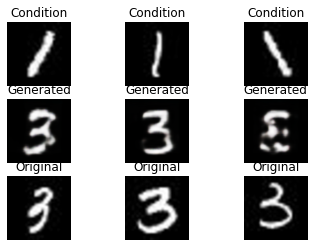

[Epoch 169/200] [Batch 1/61] [D loss: 0.261444, D acc:  45%] [G loss: 3.576065] time: 4:48:32.566060
[Epoch 169/200] [Batch 2/61] [D loss: 0.253677, D acc:  49%] [G loss: 3.664398] time: 4:48:34.192487
[Epoch 169/200] [Batch 3/61] [D loss: 0.251958, D acc:  51%] [G loss: 3.621970] time: 4:48:35.879514
[Epoch 169/200] [Batch 4/61] [D loss: 0.256610, D acc:  48%] [G loss: 3.663814] time: 4:48:37.560700
[Epoch 169/200] [Batch 5/61] [D loss: 0.254252, D acc:  48%] [G loss: 3.492820] time: 4:48:39.217518
[Epoch 169/200] [Batch 6/61] [D loss: 0.271773, D acc:  37%] [G loss: 3.427139] time: 4:48:40.909668
[Epoch 169/200] [Batch 7/61] [D loss: 0.253609, D acc:  49%] [G loss: 3.664138] time: 4:48:42.584078
[Epoch 169/200] [Batch 8/61] [D loss: 0.257395, D acc:  46%] [G loss: 3.816479] time: 4:48:44.255231
[Epoch 169/200] [Batch 9/61] [D loss: 0.253040, D acc:  51%] [G loss: 3.530974] time: 4:48:45.913136
[Epoch 169/200] [Batch 10/61] [D loss: 0.259390, D acc:  46%] [G loss: 3.588655] time: 4:48

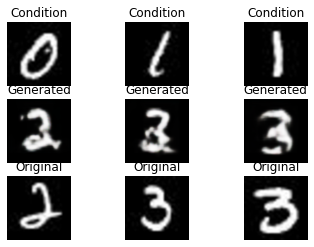

[Epoch 170/200] [Batch 1/61] [D loss: 0.236584, D acc:  64%] [G loss: 3.540035] time: 4:50:15.141619
[Epoch 170/200] [Batch 2/61] [D loss: 0.237882, D acc:  63%] [G loss: 3.674227] time: 4:50:16.726692
[Epoch 170/200] [Batch 3/61] [D loss: 0.227782, D acc:  70%] [G loss: 3.516819] time: 4:50:18.319531
[Epoch 170/200] [Batch 4/61] [D loss: 0.259126, D acc:  48%] [G loss: 3.702234] time: 4:50:19.939707
[Epoch 170/200] [Batch 5/61] [D loss: 0.247093, D acc:  55%] [G loss: 3.536501] time: 4:50:21.606362
[Epoch 170/200] [Batch 6/61] [D loss: 0.266884, D acc:  40%] [G loss: 3.574827] time: 4:50:23.194502
[Epoch 170/200] [Batch 7/61] [D loss: 0.246137, D acc:  56%] [G loss: 3.616712] time: 4:50:24.816527
[Epoch 170/200] [Batch 8/61] [D loss: 0.235271, D acc:  66%] [G loss: 3.743400] time: 4:50:26.457862
[Epoch 170/200] [Batch 9/61] [D loss: 0.256440, D acc:  49%] [G loss: 3.543222] time: 4:50:28.137729
[Epoch 170/200] [Batch 10/61] [D loss: 0.250825, D acc:  53%] [G loss: 3.678553] time: 4:50

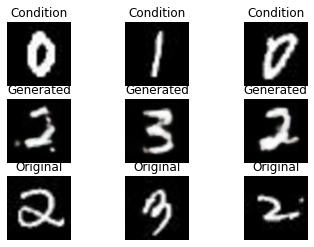

[Epoch 171/200] [Batch 1/61] [D loss: 0.201395, D acc:  74%] [G loss: 3.615631] time: 4:51:57.210613
[Epoch 171/200] [Batch 2/61] [D loss: 0.206586, D acc:  74%] [G loss: 3.676679] time: 4:51:58.822267
[Epoch 171/200] [Batch 3/61] [D loss: 0.211809, D acc:  71%] [G loss: 3.666543] time: 4:52:00.541851
[Epoch 171/200] [Batch 4/61] [D loss: 0.245480, D acc:  54%] [G loss: 3.683800] time: 4:52:02.220479
[Epoch 171/200] [Batch 5/61] [D loss: 0.276057, D acc:  45%] [G loss: 3.567953] time: 4:52:03.860015
[Epoch 171/200] [Batch 6/61] [D loss: 0.212710, D acc:  73%] [G loss: 3.549337] time: 4:52:05.621713
[Epoch 171/200] [Batch 7/61] [D loss: 0.204987, D acc:  74%] [G loss: 3.734595] time: 4:52:07.296751
[Epoch 171/200] [Batch 8/61] [D loss: 0.233718, D acc:  64%] [G loss: 3.860989] time: 4:52:08.985265
[Epoch 171/200] [Batch 9/61] [D loss: 0.245635, D acc:  56%] [G loss: 3.624440] time: 4:52:10.651632
[Epoch 171/200] [Batch 10/61] [D loss: 0.224131, D acc:  66%] [G loss: 3.538347] time: 4:52

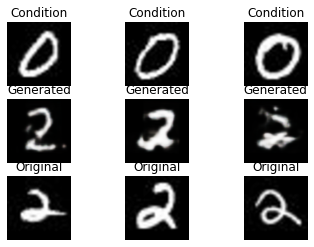

[Epoch 172/200] [Batch 1/61] [D loss: 0.100781, D acc:  93%] [G loss: 3.540627] time: 4:53:40.068242
[Epoch 172/200] [Batch 2/61] [D loss: 0.091267, D acc:  94%] [G loss: 3.672213] time: 4:53:41.684381
[Epoch 172/200] [Batch 3/61] [D loss: 0.096369, D acc:  93%] [G loss: 3.592119] time: 4:53:43.292714
[Epoch 172/200] [Batch 4/61] [D loss: 0.088612, D acc:  96%] [G loss: 3.561409] time: 4:53:44.934070
[Epoch 172/200] [Batch 5/61] [D loss: 0.093962, D acc:  95%] [G loss: 3.487666] time: 4:53:46.560162
[Epoch 172/200] [Batch 6/61] [D loss: 0.136240, D acc:  90%] [G loss: 3.824771] time: 4:53:48.285733
[Epoch 172/200] [Batch 7/61] [D loss: 0.121929, D acc:  90%] [G loss: 3.696033] time: 4:53:49.951267
[Epoch 172/200] [Batch 8/61] [D loss: 0.188844, D acc:  75%] [G loss: 3.845691] time: 4:53:51.631511
[Epoch 172/200] [Batch 9/61] [D loss: 0.246460, D acc:  65%] [G loss: 3.589704] time: 4:53:53.289628
[Epoch 172/200] [Batch 10/61] [D loss: 0.108266, D acc:  89%] [G loss: 3.750606] time: 4:53

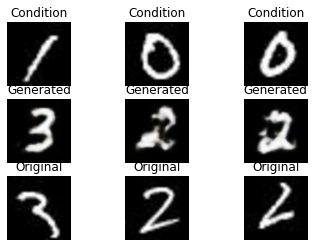

[Epoch 173/200] [Batch 1/61] [D loss: 0.020641, D acc:  99%] [G loss: 3.547188] time: 4:55:22.053234
[Epoch 173/200] [Batch 2/61] [D loss: 0.022608, D acc:  99%] [G loss: 3.615309] time: 4:55:23.684336
[Epoch 173/200] [Batch 3/61] [D loss: 0.015741, D acc:  99%] [G loss: 3.594229] time: 4:55:25.374021
[Epoch 173/200] [Batch 4/61] [D loss: 0.015318, D acc: 100%] [G loss: 3.620424] time: 4:55:27.038381
[Epoch 173/200] [Batch 5/61] [D loss: 0.012199, D acc:  99%] [G loss: 3.498045] time: 4:55:28.654264
[Epoch 173/200] [Batch 6/61] [D loss: 0.016147, D acc:  99%] [G loss: 3.529373] time: 4:55:30.366805
[Epoch 173/200] [Batch 7/61] [D loss: 0.011645, D acc: 100%] [G loss: 3.636207] time: 4:55:32.002161
[Epoch 173/200] [Batch 8/61] [D loss: 0.011019, D acc:  99%] [G loss: 3.676537] time: 4:55:33.656821
[Epoch 173/200] [Batch 9/61] [D loss: 0.009170, D acc: 100%] [G loss: 3.640405] time: 4:55:35.353855
[Epoch 173/200] [Batch 10/61] [D loss: 0.011037, D acc: 100%] [G loss: 3.583379] time: 4:55

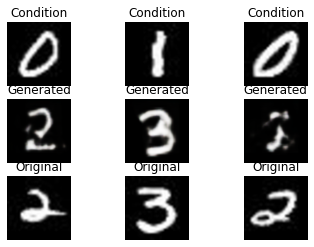

[Epoch 174/200] [Batch 1/61] [D loss: 0.017420, D acc: 100%] [G loss: 3.525116] time: 4:57:04.381940
[Epoch 174/200] [Batch 2/61] [D loss: 0.009787, D acc: 100%] [G loss: 3.585379] time: 4:57:05.979595
[Epoch 174/200] [Batch 3/61] [D loss: 0.007629, D acc: 100%] [G loss: 3.553534] time: 4:57:07.640367
[Epoch 174/200] [Batch 4/61] [D loss: 0.006926, D acc: 100%] [G loss: 3.609575] time: 4:57:09.288928
[Epoch 174/200] [Batch 5/61] [D loss: 0.006470, D acc: 100%] [G loss: 3.513507] time: 4:57:10.927392
[Epoch 174/200] [Batch 6/61] [D loss: 0.008443, D acc: 100%] [G loss: 3.455792] time: 4:57:12.681883
[Epoch 174/200] [Batch 7/61] [D loss: 0.009148, D acc: 100%] [G loss: 3.632160] time: 4:57:14.348323
[Epoch 174/200] [Batch 8/61] [D loss: 0.007160, D acc:  99%] [G loss: 3.625484] time: 4:57:16.056577
[Epoch 174/200] [Batch 9/61] [D loss: 0.006824, D acc: 100%] [G loss: 3.509309] time: 4:57:17.792260
[Epoch 174/200] [Batch 10/61] [D loss: 0.006580, D acc: 100%] [G loss: 3.618325] time: 4:57

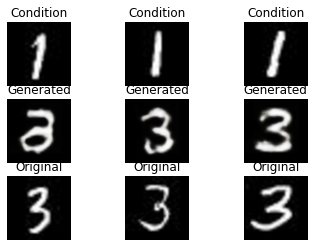

[Epoch 175/200] [Batch 1/61] [D loss: 0.006042, D acc:  99%] [G loss: 3.523447] time: 4:58:47.044463
[Epoch 175/200] [Batch 2/61] [D loss: 0.005459, D acc:  99%] [G loss: 3.625321] time: 4:58:48.640149
[Epoch 175/200] [Batch 3/61] [D loss: 0.003851, D acc: 100%] [G loss: 3.549233] time: 4:58:50.305076
[Epoch 175/200] [Batch 4/61] [D loss: 0.005037, D acc: 100%] [G loss: 3.552243] time: 4:58:51.962780
[Epoch 175/200] [Batch 5/61] [D loss: 0.004033, D acc: 100%] [G loss: 3.494882] time: 4:58:53.598914
[Epoch 175/200] [Batch 6/61] [D loss: 0.006928, D acc: 100%] [G loss: 3.559605] time: 4:58:55.200243
[Epoch 175/200] [Batch 7/61] [D loss: 0.009432, D acc: 100%] [G loss: 3.662164] time: 4:58:56.918487
[Epoch 175/200] [Batch 8/61] [D loss: 0.004644, D acc: 100%] [G loss: 3.685488] time: 4:58:58.578926
[Epoch 175/200] [Batch 9/61] [D loss: 0.004452, D acc: 100%] [G loss: 3.500827] time: 4:59:00.236948
[Epoch 175/200] [Batch 10/61] [D loss: 0.003474, D acc: 100%] [G loss: 3.557529] time: 4:59

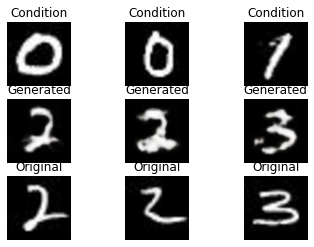

[Epoch 176/200] [Batch 1/61] [D loss: 0.004188, D acc: 100%] [G loss: 3.534395] time: 5:00:30.082195
[Epoch 176/200] [Batch 2/61] [D loss: 0.004494, D acc: 100%] [G loss: 3.548094] time: 5:00:31.662212
[Epoch 176/200] [Batch 3/61] [D loss: 0.003163, D acc: 100%] [G loss: 3.581686] time: 5:00:33.344393
[Epoch 176/200] [Batch 4/61] [D loss: 0.003621, D acc: 100%] [G loss: 3.689465] time: 5:00:35.024151
[Epoch 176/200] [Batch 5/61] [D loss: 0.003088, D acc: 100%] [G loss: 3.490451] time: 5:00:36.622176
[Epoch 176/200] [Batch 6/61] [D loss: 0.003607, D acc: 100%] [G loss: 3.428525] time: 5:00:38.403737
[Epoch 176/200] [Batch 7/61] [D loss: 0.004783, D acc: 100%] [G loss: 3.645383] time: 5:00:40.092220
[Epoch 176/200] [Batch 8/61] [D loss: 0.002919, D acc: 100%] [G loss: 3.601122] time: 5:00:41.741508
[Epoch 176/200] [Batch 9/61] [D loss: 0.003017, D acc: 100%] [G loss: 3.511952] time: 5:00:43.407809
[Epoch 176/200] [Batch 10/61] [D loss: 0.002647, D acc: 100%] [G loss: 3.576194] time: 5:00

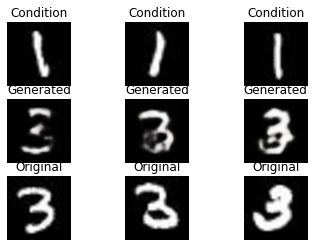

[Epoch 177/200] [Batch 1/61] [D loss: 0.005807, D acc: 100%] [G loss: 3.458277] time: 5:02:13.603680
[Epoch 177/200] [Batch 2/61] [D loss: 0.004700, D acc: 100%] [G loss: 3.587463] time: 5:02:15.201175
[Epoch 177/200] [Batch 3/61] [D loss: 0.002997, D acc: 100%] [G loss: 3.560386] time: 5:02:16.824945
[Epoch 177/200] [Batch 4/61] [D loss: 0.003196, D acc: 100%] [G loss: 3.597870] time: 5:02:18.494649
[Epoch 177/200] [Batch 5/61] [D loss: 0.002755, D acc: 100%] [G loss: 3.443298] time: 5:02:20.151325
[Epoch 177/200] [Batch 6/61] [D loss: 0.003617, D acc: 100%] [G loss: 3.468415] time: 5:02:21.906183
[Epoch 177/200] [Batch 7/61] [D loss: 0.004216, D acc: 100%] [G loss: 3.571012] time: 5:02:23.647776
[Epoch 177/200] [Batch 8/61] [D loss: 0.002461, D acc: 100%] [G loss: 3.663043] time: 5:02:25.385761
[Epoch 177/200] [Batch 9/61] [D loss: 0.002512, D acc: 100%] [G loss: 3.497287] time: 5:02:27.122664
[Epoch 177/200] [Batch 10/61] [D loss: 0.002752, D acc: 100%] [G loss: 3.489142] time: 5:02

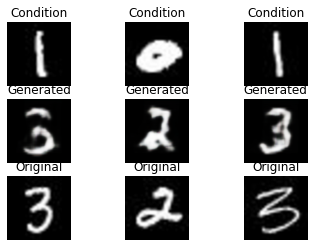

[Epoch 178/200] [Batch 1/61] [D loss: 0.069473, D acc:  99%] [G loss: 3.499820] time: 5:03:57.170616
[Epoch 178/200] [Batch 2/61] [D loss: 0.062038, D acc:  99%] [G loss: 3.571893] time: 5:03:58.791495
[Epoch 178/200] [Batch 3/61] [D loss: 0.042499, D acc:  99%] [G loss: 3.540543] time: 5:04:00.459698
[Epoch 178/200] [Batch 4/61] [D loss: 0.019215, D acc:  99%] [G loss: 3.484503] time: 5:04:02.112306
[Epoch 178/200] [Batch 5/61] [D loss: 0.018589, D acc:  99%] [G loss: 3.516276] time: 5:04:03.772941
[Epoch 178/200] [Batch 6/61] [D loss: 0.016574, D acc: 100%] [G loss: 3.502243] time: 5:04:05.463773
[Epoch 178/200] [Batch 7/61] [D loss: 0.008244, D acc: 100%] [G loss: 3.614611] time: 5:04:07.140044
[Epoch 178/200] [Batch 8/61] [D loss: 0.015463, D acc: 100%] [G loss: 3.628398] time: 5:04:08.853645
[Epoch 178/200] [Batch 9/61] [D loss: 0.012998, D acc:  99%] [G loss: 3.468297] time: 5:04:10.577327
[Epoch 178/200] [Batch 10/61] [D loss: 0.010065, D acc: 100%] [G loss: 3.542610] time: 5:04

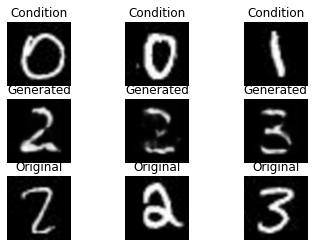

[Epoch 179/200] [Batch 1/61] [D loss: 0.014294, D acc: 100%] [G loss: 3.682297] time: 5:05:40.569105
[Epoch 179/200] [Batch 2/61] [D loss: 0.014032, D acc:  99%] [G loss: 3.547664] time: 5:05:42.186302
[Epoch 179/200] [Batch 3/61] [D loss: 0.010200, D acc: 100%] [G loss: 3.506372] time: 5:05:43.786211
[Epoch 179/200] [Batch 4/61] [D loss: 0.005650, D acc: 100%] [G loss: 3.463371] time: 5:05:45.403183
[Epoch 179/200] [Batch 5/61] [D loss: 0.008430, D acc: 100%] [G loss: 3.451652] time: 5:05:47.058572
[Epoch 179/200] [Batch 6/61] [D loss: 0.012125, D acc: 100%] [G loss: 3.434265] time: 5:05:48.745545
[Epoch 179/200] [Batch 7/61] [D loss: 0.008133, D acc: 100%] [G loss: 3.483119] time: 5:05:50.394402
[Epoch 179/200] [Batch 8/61] [D loss: 0.004535, D acc: 100%] [G loss: 3.641545] time: 5:05:52.099197
[Epoch 179/200] [Batch 9/61] [D loss: 0.003925, D acc: 100%] [G loss: 3.409283] time: 5:05:53.813203
[Epoch 179/200] [Batch 10/61] [D loss: 0.006474, D acc: 100%] [G loss: 3.504064] time: 5:05

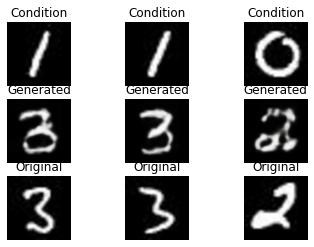

[Epoch 180/200] [Batch 1/61] [D loss: 0.004254, D acc: 100%] [G loss: 3.531450] time: 5:07:24.432862
[Epoch 180/200] [Batch 2/61] [D loss: 0.005683, D acc: 100%] [G loss: 3.517714] time: 5:07:26.068160
[Epoch 180/200] [Batch 3/61] [D loss: 0.003789, D acc: 100%] [G loss: 3.440006] time: 5:07:27.787573
[Epoch 180/200] [Batch 4/61] [D loss: 0.005071, D acc: 100%] [G loss: 3.574669] time: 5:07:29.490111
[Epoch 180/200] [Batch 5/61] [D loss: 0.002869, D acc: 100%] [G loss: 3.370082] time: 5:07:31.193622
[Epoch 180/200] [Batch 6/61] [D loss: 0.003751, D acc: 100%] [G loss: 3.578782] time: 5:07:32.920560
[Epoch 180/200] [Batch 7/61] [D loss: 0.005872, D acc: 100%] [G loss: 3.505805] time: 5:07:34.666642
[Epoch 180/200] [Batch 8/61] [D loss: 0.002718, D acc: 100%] [G loss: 3.667171] time: 5:07:36.420544
[Epoch 180/200] [Batch 9/61] [D loss: 0.002497, D acc: 100%] [G loss: 3.398271] time: 5:07:38.156425
[Epoch 180/200] [Batch 10/61] [D loss: 0.002638, D acc: 100%] [G loss: 3.487092] time: 5:07

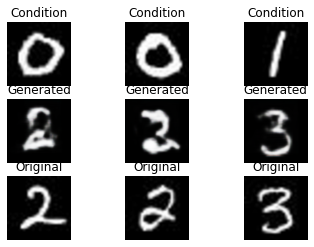

[Epoch 181/200] [Batch 1/61] [D loss: 0.005128, D acc: 100%] [G loss: 3.494504] time: 5:09:09.084338
[Epoch 181/200] [Batch 2/61] [D loss: 0.005784, D acc: 100%] [G loss: 3.616872] time: 5:09:10.700366
[Epoch 181/200] [Batch 3/61] [D loss: 0.002533, D acc: 100%] [G loss: 3.455775] time: 5:09:12.429191
[Epoch 181/200] [Batch 4/61] [D loss: 0.002000, D acc: 100%] [G loss: 3.604599] time: 5:09:14.129443
[Epoch 181/200] [Batch 5/61] [D loss: 0.002964, D acc: 100%] [G loss: 3.401170] time: 5:09:15.774656
[Epoch 181/200] [Batch 6/61] [D loss: 0.003636, D acc: 100%] [G loss: 3.495305] time: 5:09:17.445345
[Epoch 181/200] [Batch 7/61] [D loss: 0.003618, D acc: 100%] [G loss: 3.596100] time: 5:09:19.126566
[Epoch 181/200] [Batch 8/61] [D loss: 0.001988, D acc: 100%] [G loss: 3.820291] time: 5:09:20.774798
[Epoch 181/200] [Batch 9/61] [D loss: 0.002799, D acc: 100%] [G loss: 3.448235] time: 5:09:22.473875
[Epoch 181/200] [Batch 10/61] [D loss: 0.002767, D acc: 100%] [G loss: 3.498759] time: 5:09

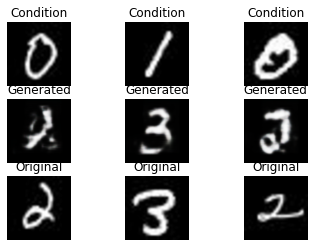

[Epoch 182/200] [Batch 1/61] [D loss: 0.003105, D acc: 100%] [G loss: 3.492042] time: 5:10:53.069079
[Epoch 182/200] [Batch 2/61] [D loss: 0.003343, D acc: 100%] [G loss: 3.588206] time: 5:10:54.721452
[Epoch 182/200] [Batch 3/61] [D loss: 0.002313, D acc: 100%] [G loss: 3.414534] time: 5:10:56.419909
[Epoch 182/200] [Batch 4/61] [D loss: 0.002373, D acc: 100%] [G loss: 3.471592] time: 5:10:58.100925
[Epoch 182/200] [Batch 5/61] [D loss: 0.002064, D acc: 100%] [G loss: 3.454384] time: 5:10:59.743209
[Epoch 182/200] [Batch 6/61] [D loss: 0.002216, D acc: 100%] [G loss: 3.335640] time: 5:11:01.467624
[Epoch 182/200] [Batch 7/61] [D loss: 0.003374, D acc: 100%] [G loss: 3.725934] time: 5:11:03.178381
[Epoch 182/200] [Batch 8/61] [D loss: 0.002552, D acc: 100%] [G loss: 3.742866] time: 5:11:04.866442
[Epoch 182/200] [Batch 9/61] [D loss: 0.002104, D acc: 100%] [G loss: 3.620180] time: 5:11:06.524556
[Epoch 182/200] [Batch 10/61] [D loss: 0.002872, D acc: 100%] [G loss: 3.417101] time: 5:11

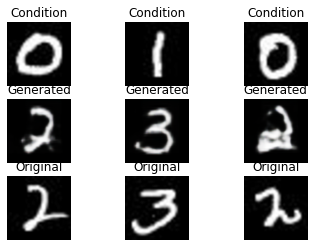

[Epoch 183/200] [Batch 1/61] [D loss: 0.002488, D acc: 100%] [G loss: 3.499490] time: 5:12:36.998233
[Epoch 183/200] [Batch 2/61] [D loss: 0.003046, D acc: 100%] [G loss: 3.553958] time: 5:12:38.625023
[Epoch 183/200] [Batch 3/61] [D loss: 0.002397, D acc: 100%] [G loss: 3.395442] time: 5:12:40.322269
[Epoch 183/200] [Batch 4/61] [D loss: 0.001883, D acc: 100%] [G loss: 3.478972] time: 5:12:42.088333
[Epoch 183/200] [Batch 5/61] [D loss: 0.001696, D acc: 100%] [G loss: 3.425968] time: 5:12:43.790065
[Epoch 183/200] [Batch 6/61] [D loss: 0.002231, D acc: 100%] [G loss: 3.410279] time: 5:12:45.532774
[Epoch 183/200] [Batch 7/61] [D loss: 0.002210, D acc: 100%] [G loss: 3.771801] time: 5:12:47.275864
[Epoch 183/200] [Batch 8/61] [D loss: 0.001702, D acc: 100%] [G loss: 3.629399] time: 5:12:49.053515
[Epoch 183/200] [Batch 9/61] [D loss: 0.001706, D acc: 100%] [G loss: 3.560673] time: 5:12:50.738593
[Epoch 183/200] [Batch 10/61] [D loss: 0.001423, D acc: 100%] [G loss: 3.566578] time: 5:12

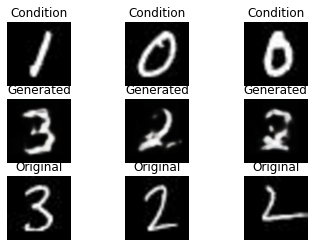

[Epoch 184/200] [Batch 1/61] [D loss: 0.002501, D acc: 100%] [G loss: 3.544846] time: 5:14:20.918347
[Epoch 184/200] [Batch 2/61] [D loss: 0.004433, D acc: 100%] [G loss: 3.631397] time: 5:14:22.534715
[Epoch 184/200] [Batch 3/61] [D loss: 0.002032, D acc: 100%] [G loss: 3.466251] time: 5:14:24.170956
[Epoch 184/200] [Batch 4/61] [D loss: 0.001923, D acc: 100%] [G loss: 3.536675] time: 5:14:25.810309
[Epoch 184/200] [Batch 5/61] [D loss: 0.001913, D acc: 100%] [G loss: 3.371488] time: 5:14:27.438930
[Epoch 184/200] [Batch 6/61] [D loss: 0.002734, D acc: 100%] [G loss: 3.480852] time: 5:14:29.117753
[Epoch 184/200] [Batch 7/61] [D loss: 0.003543, D acc: 100%] [G loss: 3.520731] time: 5:14:30.801609
[Epoch 184/200] [Batch 8/61] [D loss: 0.002336, D acc: 100%] [G loss: 3.688100] time: 5:14:32.459164
[Epoch 184/200] [Batch 9/61] [D loss: 0.001816, D acc: 100%] [G loss: 3.447072] time: 5:14:34.146689
[Epoch 184/200] [Batch 10/61] [D loss: 0.001780, D acc: 100%] [G loss: 3.703063] time: 5:14

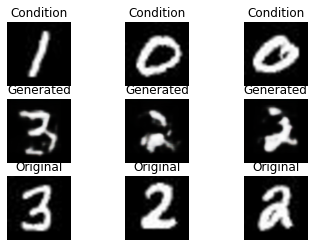

[Epoch 185/200] [Batch 1/61] [D loss: 0.002651, D acc: 100%] [G loss: 3.486730] time: 5:16:03.746826
[Epoch 185/200] [Batch 2/61] [D loss: 0.004387, D acc: 100%] [G loss: 3.488011] time: 5:16:05.357812
[Epoch 185/200] [Batch 3/61] [D loss: 0.002730, D acc: 100%] [G loss: 3.442410] time: 5:16:06.949836
[Epoch 185/200] [Batch 4/61] [D loss: 0.002534, D acc: 100%] [G loss: 3.428002] time: 5:16:08.577518
[Epoch 185/200] [Batch 5/61] [D loss: 0.001660, D acc: 100%] [G loss: 3.356455] time: 5:16:10.211811
[Epoch 185/200] [Batch 6/61] [D loss: 0.003149, D acc: 100%] [G loss: 3.355203] time: 5:16:11.876613
[Epoch 185/200] [Batch 7/61] [D loss: 0.003249, D acc: 100%] [G loss: 3.562539] time: 5:16:13.507205
[Epoch 185/200] [Batch 8/61] [D loss: 0.001417, D acc: 100%] [G loss: 3.610535] time: 5:16:15.203733
[Epoch 185/200] [Batch 9/61] [D loss: 0.001793, D acc: 100%] [G loss: 3.544745] time: 5:16:16.879465
[Epoch 185/200] [Batch 10/61] [D loss: 0.001579, D acc: 100%] [G loss: 3.482509] time: 5:16

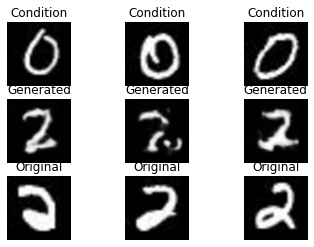

[Epoch 186/200] [Batch 1/61] [D loss: 0.005920, D acc: 100%] [G loss: 3.727225] time: 5:17:46.029350
[Epoch 186/200] [Batch 2/61] [D loss: 0.004191, D acc: 100%] [G loss: 3.706534] time: 5:17:47.676678
[Epoch 186/200] [Batch 3/61] [D loss: 0.003431, D acc: 100%] [G loss: 3.473854] time: 5:17:49.294187
[Epoch 186/200] [Batch 4/61] [D loss: 0.003197, D acc: 100%] [G loss: 3.498728] time: 5:17:50.934846
[Epoch 186/200] [Batch 5/61] [D loss: 0.001688, D acc: 100%] [G loss: 3.369120] time: 5:17:52.615325
[Epoch 186/200] [Batch 6/61] [D loss: 0.002211, D acc: 100%] [G loss: 3.342477] time: 5:17:54.323157
[Epoch 186/200] [Batch 7/61] [D loss: 0.002329, D acc: 100%] [G loss: 3.476327] time: 5:17:56.015960
[Epoch 186/200] [Batch 8/61] [D loss: 0.001611, D acc: 100%] [G loss: 3.715841] time: 5:17:57.706881
[Epoch 186/200] [Batch 9/61] [D loss: 0.001507, D acc: 100%] [G loss: 3.438406] time: 5:17:59.445776
[Epoch 186/200] [Batch 10/61] [D loss: 0.001716, D acc: 100%] [G loss: 3.480030] time: 5:18

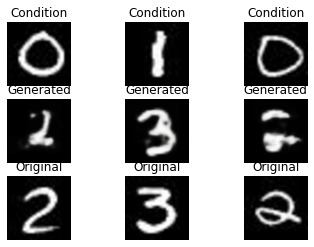

[Epoch 187/200] [Batch 1/61] [D loss: 0.001946, D acc: 100%] [G loss: 3.436340] time: 5:19:28.865879
[Epoch 187/200] [Batch 2/61] [D loss: 0.004271, D acc: 100%] [G loss: 3.517721] time: 5:19:30.511875
[Epoch 187/200] [Batch 3/61] [D loss: 0.003657, D acc: 100%] [G loss: 3.484993] time: 5:19:32.138337
[Epoch 187/200] [Batch 4/61] [D loss: 0.003276, D acc: 100%] [G loss: 3.492541] time: 5:19:33.771255
[Epoch 187/200] [Batch 5/61] [D loss: 0.001496, D acc: 100%] [G loss: 3.398461] time: 5:19:35.445725
[Epoch 187/200] [Batch 6/61] [D loss: 0.002635, D acc: 100%] [G loss: 3.393818] time: 5:19:37.132225
[Epoch 187/200] [Batch 7/61] [D loss: 0.003419, D acc: 100%] [G loss: 3.509376] time: 5:19:38.764238
[Epoch 187/200] [Batch 8/61] [D loss: 0.001333, D acc: 100%] [G loss: 3.572714] time: 5:19:40.472408
[Epoch 187/200] [Batch 9/61] [D loss: 0.001660, D acc: 100%] [G loss: 3.517609] time: 5:19:42.180497
[Epoch 187/200] [Batch 10/61] [D loss: 0.002789, D acc: 100%] [G loss: 3.441030] time: 5:19

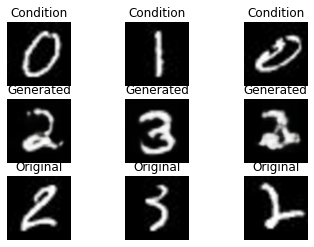

[Epoch 188/200] [Batch 1/61] [D loss: 0.003068, D acc: 100%] [G loss: 3.389163] time: 5:21:11.390518
[Epoch 188/200] [Batch 2/61] [D loss: 0.004788, D acc: 100%] [G loss: 3.569495] time: 5:21:13.014692
[Epoch 188/200] [Batch 3/61] [D loss: 0.004315, D acc: 100%] [G loss: 3.439290] time: 5:21:14.621585
[Epoch 188/200] [Batch 4/61] [D loss: 0.003149, D acc: 100%] [G loss: 3.557761] time: 5:21:16.269126
[Epoch 188/200] [Batch 5/61] [D loss: 0.001533, D acc: 100%] [G loss: 3.435334] time: 5:21:17.984366
[Epoch 188/200] [Batch 6/61] [D loss: 0.004116, D acc: 100%] [G loss: 3.374278] time: 5:21:19.700223
[Epoch 188/200] [Batch 7/61] [D loss: 0.006021, D acc: 100%] [G loss: 3.549573] time: 5:21:21.370044
[Epoch 188/200] [Batch 8/61] [D loss: 0.001691, D acc: 100%] [G loss: 3.629790] time: 5:21:23.054944
[Epoch 188/200] [Batch 9/61] [D loss: 0.001831, D acc: 100%] [G loss: 3.409248] time: 5:21:24.766011
[Epoch 188/200] [Batch 10/61] [D loss: 0.001936, D acc: 100%] [G loss: 3.464274] time: 5:21

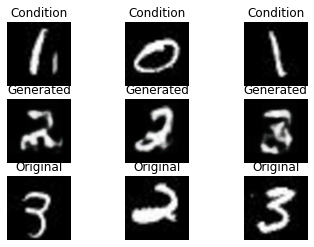

[Epoch 189/200] [Batch 1/61] [D loss: 0.002545, D acc: 100%] [G loss: 3.568055] time: 5:22:54.085893
[Epoch 189/200] [Batch 2/61] [D loss: 0.003793, D acc: 100%] [G loss: 3.639098] time: 5:22:55.701933
[Epoch 189/200] [Batch 3/61] [D loss: 0.002021, D acc: 100%] [G loss: 3.588397] time: 5:22:57.292852
[Epoch 189/200] [Batch 4/61] [D loss: 0.001766, D acc: 100%] [G loss: 3.534250] time: 5:22:58.872958
[Epoch 189/200] [Batch 5/61] [D loss: 0.001399, D acc: 100%] [G loss: 3.333597] time: 5:23:00.502064
[Epoch 189/200] [Batch 6/61] [D loss: 0.002411, D acc: 100%] [G loss: 3.361586] time: 5:23:02.165621
[Epoch 189/200] [Batch 7/61] [D loss: 0.003016, D acc: 100%] [G loss: 3.570532] time: 5:23:03.831794
[Epoch 189/200] [Batch 8/61] [D loss: 0.001564, D acc: 100%] [G loss: 3.681991] time: 5:23:05.609472
[Epoch 189/200] [Batch 9/61] [D loss: 0.001414, D acc: 100%] [G loss: 3.460302] time: 5:23:07.322397
[Epoch 189/200] [Batch 10/61] [D loss: 0.002892, D acc: 100%] [G loss: 3.500827] time: 5:23

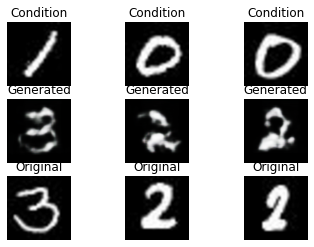

[Epoch 190/200] [Batch 1/61] [D loss: 0.001977, D acc: 100%] [G loss: 3.619635] time: 5:24:35.152445
[Epoch 190/200] [Batch 2/61] [D loss: 0.002786, D acc: 100%] [G loss: 3.463631] time: 5:24:36.753476
[Epoch 190/200] [Batch 3/61] [D loss: 0.001729, D acc: 100%] [G loss: 3.764372] time: 5:24:38.332317
[Epoch 190/200] [Batch 4/61] [D loss: 0.001767, D acc: 100%] [G loss: 3.462206] time: 5:24:39.898645
[Epoch 190/200] [Batch 5/61] [D loss: 0.001311, D acc: 100%] [G loss: 3.425389] time: 5:24:41.509500
[Epoch 190/200] [Batch 6/61] [D loss: 0.003045, D acc: 100%] [G loss: 3.274958] time: 5:24:43.156802
[Epoch 190/200] [Batch 7/61] [D loss: 0.003925, D acc: 100%] [G loss: 3.451966] time: 5:24:44.770581
[Epoch 190/200] [Batch 8/61] [D loss: 0.002008, D acc: 100%] [G loss: 3.610039] time: 5:24:46.438704
[Epoch 190/200] [Batch 9/61] [D loss: 0.001295, D acc: 100%] [G loss: 3.364306] time: 5:24:48.093935
[Epoch 190/200] [Batch 10/61] [D loss: 0.003614, D acc: 100%] [G loss: 3.441180] time: 5:24

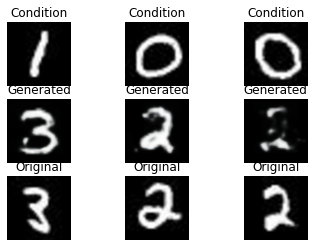

[Epoch 191/200] [Batch 1/61] [D loss: 0.002193, D acc: 100%] [G loss: 3.367777] time: 5:26:15.973533
[Epoch 191/200] [Batch 2/61] [D loss: 0.002253, D acc: 100%] [G loss: 3.524649] time: 5:26:17.548789
[Epoch 191/200] [Batch 3/61] [D loss: 0.001411, D acc: 100%] [G loss: 3.508563] time: 5:26:19.161505
[Epoch 191/200] [Batch 4/61] [D loss: 0.001428, D acc: 100%] [G loss: 3.669223] time: 5:26:20.752960
[Epoch 191/200] [Batch 5/61] [D loss: 0.001391, D acc: 100%] [G loss: 3.439375] time: 5:26:22.381238
[Epoch 191/200] [Batch 6/61] [D loss: 0.002184, D acc: 100%] [G loss: 3.451552] time: 5:26:24.044491
[Epoch 191/200] [Batch 7/61] [D loss: 0.001885, D acc: 100%] [G loss: 3.480640] time: 5:26:25.654473
[Epoch 191/200] [Batch 8/61] [D loss: 0.001688, D acc: 100%] [G loss: 3.590568] time: 5:26:27.353252
[Epoch 191/200] [Batch 9/61] [D loss: 0.001308, D acc: 100%] [G loss: 3.374857] time: 5:26:29.009467
[Epoch 191/200] [Batch 10/61] [D loss: 0.001714, D acc: 100%] [G loss: 3.434456] time: 5:26

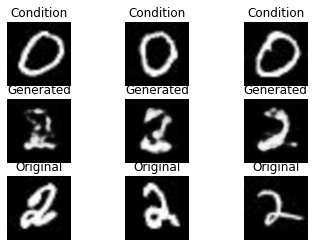

[Epoch 192/200] [Batch 1/61] [D loss: 0.001895, D acc: 100%] [G loss: 3.395860] time: 5:27:57.582882
[Epoch 192/200] [Batch 2/61] [D loss: 0.002467, D acc: 100%] [G loss: 3.556991] time: 5:27:59.194732
[Epoch 192/200] [Batch 3/61] [D loss: 0.002077, D acc: 100%] [G loss: 3.473515] time: 5:28:00.767497
[Epoch 192/200] [Batch 4/61] [D loss: 0.001773, D acc: 100%] [G loss: 3.582748] time: 5:28:02.372199
[Epoch 192/200] [Batch 5/61] [D loss: 0.001208, D acc: 100%] [G loss: 3.364040] time: 5:28:03.992355
[Epoch 192/200] [Batch 6/61] [D loss: 0.003103, D acc: 100%] [G loss: 3.476461] time: 5:28:05.638187
[Epoch 192/200] [Batch 7/61] [D loss: 0.005313, D acc: 100%] [G loss: 3.571848] time: 5:28:07.275341
[Epoch 192/200] [Batch 8/61] [D loss: 0.002406, D acc: 100%] [G loss: 3.666203] time: 5:28:08.919552
[Epoch 192/200] [Batch 9/61] [D loss: 0.001313, D acc: 100%] [G loss: 3.392401] time: 5:28:10.602141
[Epoch 192/200] [Batch 10/61] [D loss: 0.001510, D acc: 100%] [G loss: 3.458854] time: 5:28

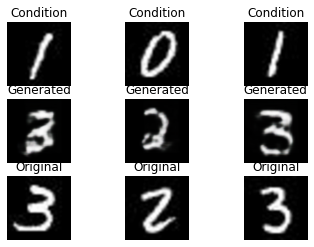

[Epoch 193/200] [Batch 1/61] [D loss: 0.002281, D acc: 100%] [G loss: 3.439389] time: 5:29:38.962706
[Epoch 193/200] [Batch 2/61] [D loss: 0.002495, D acc: 100%] [G loss: 3.410895] time: 5:29:40.564478
[Epoch 193/200] [Batch 3/61] [D loss: 0.001392, D acc: 100%] [G loss: 3.412316] time: 5:29:42.144593
[Epoch 193/200] [Batch 4/61] [D loss: 0.001448, D acc: 100%] [G loss: 3.540748] time: 5:29:43.745677
[Epoch 193/200] [Batch 5/61] [D loss: 0.001060, D acc: 100%] [G loss: 3.274230] time: 5:29:45.344551
[Epoch 193/200] [Batch 6/61] [D loss: 0.002090, D acc: 100%] [G loss: 3.366881] time: 5:29:46.984077
[Epoch 193/200] [Batch 7/61] [D loss: 0.002542, D acc: 100%] [G loss: 3.592760] time: 5:29:48.632109
[Epoch 193/200] [Batch 8/61] [D loss: 0.001820, D acc: 100%] [G loss: 3.510537] time: 5:29:50.224559
[Epoch 193/200] [Batch 9/61] [D loss: 0.002434, D acc: 100%] [G loss: 3.571877] time: 5:29:51.891447
[Epoch 193/200] [Batch 10/61] [D loss: 0.001844, D acc: 100%] [G loss: 3.437021] time: 5:29

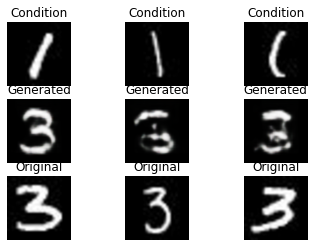

[Epoch 194/200] [Batch 1/61] [D loss: 0.004049, D acc: 100%] [G loss: 3.384120] time: 5:31:19.745212
[Epoch 194/200] [Batch 2/61] [D loss: 0.003918, D acc: 100%] [G loss: 3.485177] time: 5:31:21.332174
[Epoch 194/200] [Batch 3/61] [D loss: 0.002399, D acc: 100%] [G loss: 3.431913] time: 5:31:22.928288
[Epoch 194/200] [Batch 4/61] [D loss: 0.002836, D acc: 100%] [G loss: 3.426656] time: 5:31:24.518787
[Epoch 194/200] [Batch 5/61] [D loss: 0.001774, D acc: 100%] [G loss: 3.438820] time: 5:31:26.136608
[Epoch 194/200] [Batch 6/61] [D loss: 0.002192, D acc: 100%] [G loss: 3.536946] time: 5:31:27.808303
[Epoch 194/200] [Batch 7/61] [D loss: 0.002742, D acc: 100%] [G loss: 3.541976] time: 5:31:29.421551
[Epoch 194/200] [Batch 8/61] [D loss: 0.001614, D acc: 100%] [G loss: 3.516049] time: 5:31:31.050805
[Epoch 194/200] [Batch 9/61] [D loss: 0.001452, D acc: 100%] [G loss: 3.461607] time: 5:31:32.693967
[Epoch 194/200] [Batch 10/61] [D loss: 0.001924, D acc: 100%] [G loss: 3.462801] time: 5:31

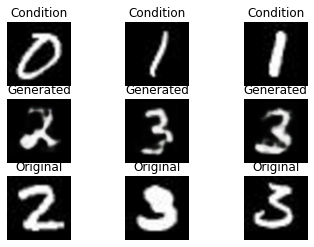

[Epoch 195/200] [Batch 1/61] [D loss: 0.005087, D acc: 100%] [G loss: 3.419013] time: 5:33:01.166455
[Epoch 195/200] [Batch 2/61] [D loss: 0.002961, D acc: 100%] [G loss: 3.499255] time: 5:33:02.749467
[Epoch 195/200] [Batch 3/61] [D loss: 0.001370, D acc: 100%] [G loss: 3.397566] time: 5:33:04.331304
[Epoch 195/200] [Batch 4/61] [D loss: 0.001789, D acc: 100%] [G loss: 3.404073] time: 5:33:05.912599
[Epoch 195/200] [Batch 5/61] [D loss: 0.001486, D acc: 100%] [G loss: 3.418778] time: 5:33:07.511667
[Epoch 195/200] [Batch 6/61] [D loss: 0.001992, D acc: 100%] [G loss: 3.418329] time: 5:33:09.190423
[Epoch 195/200] [Batch 7/61] [D loss: 0.002466, D acc: 100%] [G loss: 3.900085] time: 5:33:10.819486
[Epoch 195/200] [Batch 8/61] [D loss: 0.001462, D acc: 100%] [G loss: 3.578183] time: 5:33:12.441167
[Epoch 195/200] [Batch 9/61] [D loss: 0.001055, D acc: 100%] [G loss: 3.626944] time: 5:33:14.084783
[Epoch 195/200] [Batch 10/61] [D loss: 0.001688, D acc: 100%] [G loss: 3.487370] time: 5:33

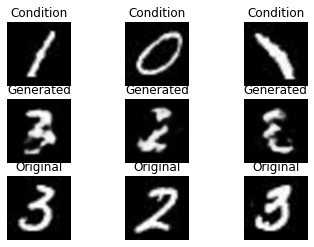

[Epoch 196/200] [Batch 1/61] [D loss: 0.003360, D acc: 100%] [G loss: 3.417152] time: 5:34:43.273956
[Epoch 196/200] [Batch 2/61] [D loss: 0.004538, D acc: 100%] [G loss: 3.542869] time: 5:34:44.871544
[Epoch 196/200] [Batch 3/61] [D loss: 0.002611, D acc: 100%] [G loss: 3.482220] time: 5:34:46.471820
[Epoch 196/200] [Batch 4/61] [D loss: 0.001968, D acc: 100%] [G loss: 3.411290] time: 5:34:48.148627
[Epoch 196/200] [Batch 5/61] [D loss: 0.001759, D acc: 100%] [G loss: 3.374585] time: 5:34:49.796796
[Epoch 196/200] [Batch 6/61] [D loss: 0.006010, D acc: 100%] [G loss: 3.443305] time: 5:34:51.430387
[Epoch 196/200] [Batch 7/61] [D loss: 0.007481, D acc: 100%] [G loss: 3.477282] time: 5:34:53.088900
[Epoch 196/200] [Batch 8/61] [D loss: 0.002983, D acc: 100%] [G loss: 3.823894] time: 5:34:54.755183
[Epoch 196/200] [Batch 9/61] [D loss: 0.002851, D acc: 100%] [G loss: 3.373651] time: 5:34:56.431240
[Epoch 196/200] [Batch 10/61] [D loss: 0.004335, D acc:  99%] [G loss: 3.761911] time: 5:34

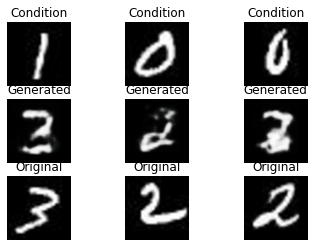

[Epoch 197/200] [Batch 1/61] [D loss: 0.002862, D acc: 100%] [G loss: 3.390904] time: 5:36:25.495347
[Epoch 197/200] [Batch 2/61] [D loss: 0.002223, D acc: 100%] [G loss: 3.553100] time: 5:36:27.094619
[Epoch 197/200] [Batch 3/61] [D loss: 0.001695, D acc: 100%] [G loss: 3.479289] time: 5:36:28.722010
[Epoch 197/200] [Batch 4/61] [D loss: 0.001310, D acc: 100%] [G loss: 3.424010] time: 5:36:30.341458
[Epoch 197/200] [Batch 5/61] [D loss: 0.001493, D acc: 100%] [G loss: 3.351040] time: 5:36:32.017327
[Epoch 197/200] [Batch 6/61] [D loss: 0.002152, D acc: 100%] [G loss: 3.350904] time: 5:36:33.708635
[Epoch 197/200] [Batch 7/61] [D loss: 0.002596, D acc: 100%] [G loss: 3.490742] time: 5:36:35.358117
[Epoch 197/200] [Batch 8/61] [D loss: 0.001591, D acc: 100%] [G loss: 3.671266] time: 5:36:37.042228
[Epoch 197/200] [Batch 9/61] [D loss: 0.001433, D acc: 100%] [G loss: 3.423653] time: 5:36:38.723580
[Epoch 197/200] [Batch 10/61] [D loss: 0.001537, D acc: 100%] [G loss: 3.540619] time: 5:36

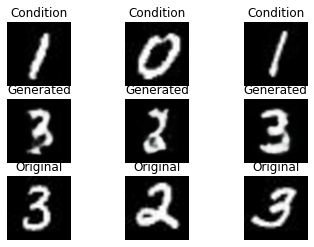

[Epoch 198/200] [Batch 1/61] [D loss: 0.036361, D acc:  99%] [G loss: 3.390965] time: 5:38:08.902534
[Epoch 198/200] [Batch 2/61] [D loss: 0.063785, D acc:  97%] [G loss: 3.514294] time: 5:38:10.520652
[Epoch 198/200] [Batch 3/61] [D loss: 0.026852, D acc:  99%] [G loss: 3.467227] time: 5:38:12.119306
[Epoch 198/200] [Batch 4/61] [D loss: 0.050159, D acc:  99%] [G loss: 3.451182] time: 5:38:13.736362
[Epoch 198/200] [Batch 5/61] [D loss: 0.075467, D acc:  98%] [G loss: 3.392794] time: 5:38:15.368328
[Epoch 198/200] [Batch 6/61] [D loss: 0.660005, D acc:   3%] [G loss: 3.329576] time: 5:38:17.027060
[Epoch 198/200] [Batch 7/61] [D loss: 0.082004, D acc:  93%] [G loss: 3.589110] time: 5:38:18.655204
[Epoch 198/200] [Batch 8/61] [D loss: 0.260784, D acc:  48%] [G loss: 3.534946] time: 5:38:20.363370
[Epoch 198/200] [Batch 9/61] [D loss: 0.087313, D acc:  97%] [G loss: 3.392054] time: 5:38:22.050896
[Epoch 198/200] [Batch 10/61] [D loss: 0.126768, D acc:  96%] [G loss: 3.488012] time: 5:38

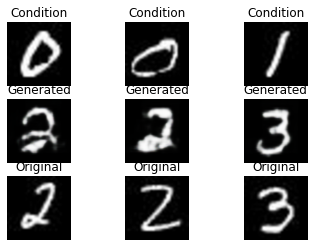

[Epoch 199/200] [Batch 1/61] [D loss: 0.004829, D acc: 100%] [G loss: 3.328871] time: 5:39:52.423604
[Epoch 199/200] [Batch 2/61] [D loss: 0.002982, D acc: 100%] [G loss: 3.592750] time: 5:39:54.028319
[Epoch 199/200] [Batch 3/61] [D loss: 0.004141, D acc: 100%] [G loss: 3.255086] time: 5:39:55.645110
[Epoch 199/200] [Batch 4/61] [D loss: 0.003092, D acc: 100%] [G loss: 3.394135] time: 5:39:57.259959
[Epoch 199/200] [Batch 5/61] [D loss: 0.003068, D acc: 100%] [G loss: 3.266502] time: 5:39:58.952260
[Epoch 199/200] [Batch 6/61] [D loss: 0.004083, D acc: 100%] [G loss: 3.258407] time: 5:40:00.618172
[Epoch 199/200] [Batch 7/61] [D loss: 0.003360, D acc: 100%] [G loss: 3.369100] time: 5:40:02.246077
[Epoch 199/200] [Batch 8/61] [D loss: 0.002648, D acc: 100%] [G loss: 3.546467] time: 5:40:03.912126
[Epoch 199/200] [Batch 9/61] [D loss: 0.002498, D acc: 100%] [G loss: 3.427795] time: 5:40:05.602096
[Epoch 199/200] [Batch 10/61] [D loss: 0.003243, D acc: 100%] [G loss: 3.306032] time: 5:40

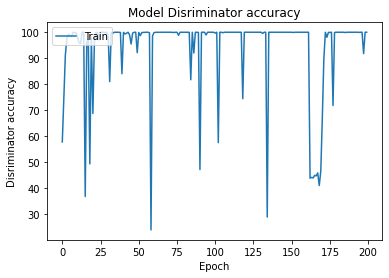

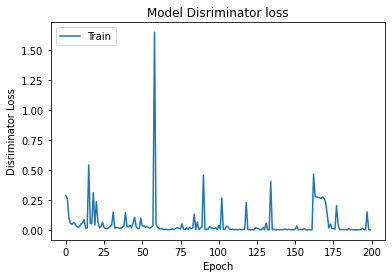

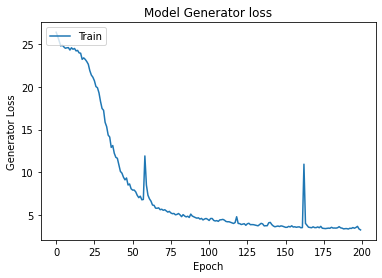

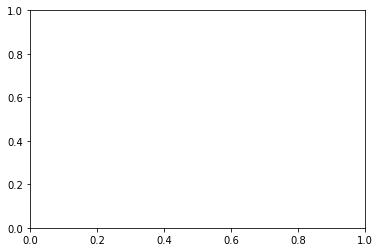

In [5]:
from __future__ import print_function, division
import scipy

from keras.datasets import mnist
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import datetime
import matplotlib.pyplot as plt
import sys
import numpy as np
import os

class Pix2Pix():
    def __init__(self):
        # Input shape
        self.img_rows = 128# 256
        self.img_cols = 128 # 256
        self.channels = 3
        self.img_shape = (self.img_rows, self.img_cols, self.channels)

        self.history = [[],[],[],[]]

        # Configure data loader
        self.dataset_name = 'turn_mnist'
        self.data_loader = DataLoader(dataset_name=self.dataset_name,
                                      img_res=(self.img_rows, self.img_cols))

        # Calculate output shape of D (PatchGAN)
        patch = int(self.img_rows / 2**4)
        self.disc_patch = (patch, patch, 1)

        # Number of filters in the first layer of G and D
        self.gf = 64
        self.df = 64

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='mse',
            optimizer=optimizer,
            metrics=['accuracy'])

        #-------------------------
        # Construct Computational
        #   Graph of Generator
        #-------------------------

        # Build the generator
        self.generator = self.build_generator()

        # Input images and their conditioning images
        img_A = Input(shape=self.img_shape)
        img_B = Input(shape=self.img_shape)

        # By conditioning on B generate a fake version of A
        fake_A = self.generator(img_B)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # Discriminators determines validity of translated images / condition pairs
        valid = self.discriminator([fake_A, img_B])

        self.combined = Model(inputs=[img_A, img_B], outputs=[valid, fake_A])
        self.combined.compile(loss=['mse', 'mae'],
                              loss_weights=[1, 100],
                              optimizer=optimizer)

    def build_generator(self):
        """U-Net Generator"""

        def conv2d(layer_input, filters, f_size=4, bn=True):
            """Layers used during downsampling"""
            d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
            d = LeakyReLU(alpha=0.2)(d)
            if bn:
                d = BatchNormalization(momentum=0.8)(d)
            return d

        def deconv2d(layer_input, skip_input, filters, f_size=4, dropout_rate=0):
            """Layers used during upsampling"""
            u = UpSampling2D(size=2)(layer_input)
            u = Conv2D(filters, kernel_size=f_size, strides=1, padding='same', activation='relu')(u)
            if dropout_rate:
                u = Dropout(dropout_rate)(u)
            u = BatchNormalization(momentum=0.8)(u)
            u = Concatenate()([u, skip_input])
            return u

        # Image input
        d0 = Input(shape=self.img_shape)

        # Downsampling
        d1 = conv2d(d0, self.gf, bn=False)
        d2 = conv2d(d1, self.gf*2)
        d3 = conv2d(d2, self.gf*4)
        d4 = conv2d(d3, self.gf*8)
        d5 = conv2d(d4, self.gf*8)
        d6 = conv2d(d5, self.gf*8)
        d7 = conv2d(d6, self.gf*8)

        # Upsampling
        u1 = deconv2d(d7, d6, self.gf*8)
        u2 = deconv2d(u1, d5, self.gf*8)
        u3 = deconv2d(u2, d4, self.gf*8)
        u4 = deconv2d(u3, d3, self.gf*4)
        u5 = deconv2d(u4, d2, self.gf*2)
        u6 = deconv2d(u5, d1, self.gf)

        u7 = UpSampling2D(size=2)(u6)
        output_img = Conv2D(self.channels, kernel_size=4, strides=1, padding='same', activation='tanh')(u7)

        return Model(d0, output_img)

    def build_discriminator(self):

        def d_layer(layer_input, filters, f_size=4, bn=True):
            """Discriminator layer"""
            d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
            d = LeakyReLU(alpha=0.2)(d)
            if bn:
                d = BatchNormalization(momentum=0.8)(d)
            return d

        img_A = Input(shape=self.img_shape)
        img_B = Input(shape=self.img_shape)

        # Concatenate image and conditioning image by channels to produce input
        combined_imgs = Concatenate(axis=-1)([img_A, img_B])

        d1 = d_layer(combined_imgs, self.df, bn=False)
        d2 = d_layer(d1, self.df*2)
        d3 = d_layer(d2, self.df*4)
        d4 = d_layer(d3, self.df*8)

        validity = Conv2D(1, kernel_size=4, strides=1, padding='same')(d4)

        return Model([img_A, img_B], validity)

    def train(self, epochs, batch_size=1, sample_interval=50):

        start_time = datetime.datetime.now()

        # Adversarial loss ground truths
        valid = np.ones((batch_size,) + self.disc_patch)
        fake = np.zeros((batch_size,) + self.disc_patch)

        for epoch in range(epochs):
            for batch_i, (imgs_A, imgs_B) in enumerate(self.data_loader.load_batch(batch_size)):

                # ---------------------
                #  Train Discriminator
                # ---------------------

                # Condition on B and generate a translated version
                fake_A = self.generator.predict(imgs_B)

                # Train the discriminators (original images = real / generated = Fake)
                d_loss_real = self.discriminator.train_on_batch([imgs_A, imgs_B], valid)
                d_loss_fake = self.discriminator.train_on_batch([fake_A, imgs_B], fake)
                d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

                # -----------------
                #  Train Generator
                # -----------------

                # Train the generators
                g_loss = self.combined.train_on_batch([imgs_A, imgs_B], [valid, imgs_A])

                elapsed_time = datetime.datetime.now() - start_time
                # Plot the progress
                print ("[Epoch %d/%d] [Batch %d/%d] [D loss: %f, D acc: %3d%%] [G loss: %f] time: %s" % (epoch, epochs,
                                                                        batch_i, self.data_loader.n_batches,
                                                                        d_loss[0], 100*d_loss[1],
                                                                        g_loss[0],
                                                                        elapsed_time))
                                                                        
                #self.sample_images(epoch, batch_i)
                # If at save interval => save generated image samples
                if batch_i % sample_interval == 0:
                    self.sample_images(epoch, batch_i)
            self.history[0].append(epoch)
            self.history[1].append(d_loss[0])
            self.history[2].append(100*d_loss[1])
            self.history[3].append(g_loss[0])      

    def sample_images(self, epoch, batch_i):
        os.makedirs('/content/drive/My Drive/Colab Notebooks/datasets/imagesP2P/%s' % self.dataset_name, exist_ok=True)
        r, c = 3, 3

        imgs_A, imgs_B = self.data_loader.load_data(batch_size=3, is_testing=True)
        fake_A = self.generator.predict(imgs_B)

        gen_imgs = np.concatenate([imgs_B, fake_A, imgs_A])

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        titles = ['Condition', 'Generated', 'Original']
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt])
                axs[i, j].set_title(titles[i])
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("/content/drive/My Drive/Colab Notebooks/datasets/imagesP2P/%s/%d_%d.png" % (self.dataset_name, epoch, batch_i))
        plt.show()
        plt.close()
        self.generator.save("/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist/models/model_generator.h5")
        self.discriminator.save("/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist/models/model_discriminator.h5")

#def run_programm():
gan = Pix2Pix()
gan.train(epochs=200, batch_size=64, sample_interval=200) # epochs=200, batch_size=64, sample_interval=200

## Визуализация процесса обучения

# Сохраним внешний вид нашей модели в файл ".png"
from keras.utils import plot_model
plot_model(gan.generator, to_file='/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist/models/architecture_generator_model.png')
plot_model(gan.discriminator, to_file='/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist/models/architecture_discriminator_model.png')

#print(gan.history[0])
#print(gan.history[1])
#print(gan.history[2])
#print(gan.history[3])

# Plot training & validation accuracy values
plt.plot(gan.history[0],gan.history[2])
plt.title('Model Disriminator accuracy')
plt.ylabel('Disriminator accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

fig, ax = plt.subplots()
fig.savefig('/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist/models/discriminator_accuracy_img.png')

# Plot training & validation loss values
plt.plot(gan.history[0],gan.history[1])
plt.title('Model Disriminator loss')
plt.ylabel('Disriminator Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

fig, ax = plt.subplots()
fig.savefig('/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist/models/discriminator_loss_img.png')

# Plot training & validation loss values
plt.plot(gan.history[0],gan.history[3])
plt.title('Model Generator loss')
plt.ylabel('Generator Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

fig, ax = plt.subplots()
fig.savefig('/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist/models/generator_loss_img.png')

#run_programm()    

In [6]:
print("END_OF_PROGRAMM")

END_OF_PROGRAMM
